# COGS 118B: Unsupervised Machine Learning Algorithms

## Spectral Clustering 

In this assignment, I was given some skeleton code to implement exploring spectral clustering. At the bottom of this assignment, after plotting visualizations of the various steps of spectral clustering (including the initial plot of how k-means would classify the data), I comment on the different visualization and the sigma squared parameter.

In [410]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.cluster import KMeans

%matplotlib inline

## `eigsort.m`

In [411]:
# [Vsort,Dsort] = eigsort(V, eigvals)
#
# Sorts a matrix eigenvectors and a array of eigenvalues in order 
# of eigenvalue size, largest eigenvalue first and smallest eigenvalue
# last.
#
# Example usage:
# di, V = np.linarg.eig(L)
# Vnew, Dnew = eigsort(V, di)
#
# Tim Marks 2002

In [412]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

## `spectclust.m`

In [413]:
# refs
# [1]	Shi, J., and J. Malik (1997) "Normalized Cuts and Image Segmentation",
# 	in Proc. of IEEE Conf. on Comp. Vision and Pattern Recognition, 
# 	Puerto Rico.

# [2]	Kannan, R., S. Vempala, and A. Vetta (2000) "On Clusterings - Good, Bad %%	and Spectral", Tech. Report, CS Dept., Yale University.

# This code is from ref [3] 
# [3]	Ng, A. Y., M. I. Jordan, and Y. Weiss (2001) "On Spectral Clustering:
#  	Analysis and an algorithm", in Advances in Neural Information Processing%%	Systems 14.


# [4]	Weiss, Y. (1999) "Segmentation using eigenvectors: a unifying view", 
# 	Tech. Rep., CS. Dept., UC Berkeley.

In [414]:
# For question 9 uncomment this code to make your own random data of the same form
# r1 = 5
# r2 = 10
# set1 = np.random.uniform(low=0,high=2*np.pi,size=(1,20))
# set2 = np.random.uniform(low=0,high=2*np.pi,size=(1,30))
# d1 = np.vstack((r1*np.cos(set1),r1*np.sin(set1)))
# d2 = np.vstack((r2*np.cos(set2),r2*np.sin(set2)))

In [415]:
# For question 9 comment out the next 3 lines
allpts = sio.loadmat('HW3.mat')['allpts']
d1 = allpts[0:20].T
d2 = allpts[20:50].T

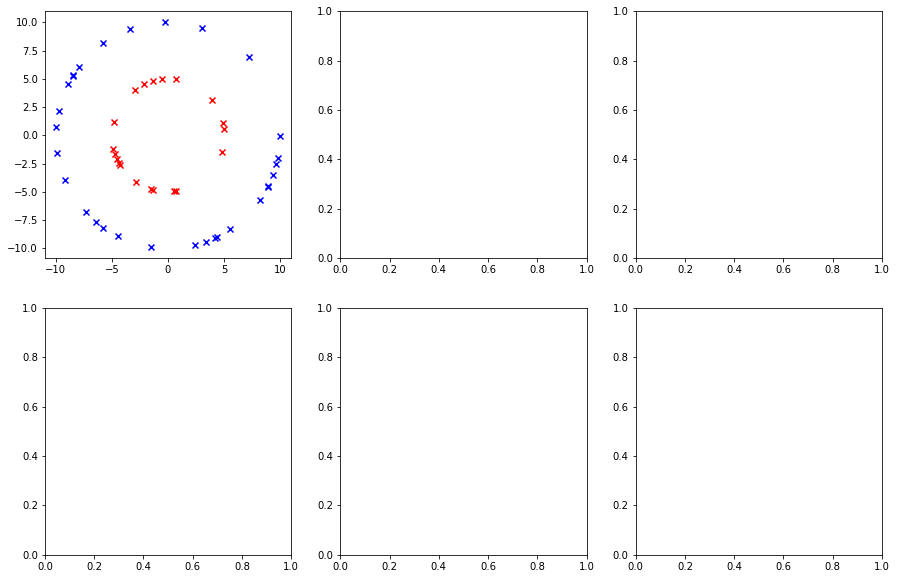

In [416]:
fig, axes = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)

ax = axes[0,0]
ax.scatter(d1[0,:], d1[1,:], c='r', marker='x')
ax.scatter(d2[0,:], d2[1,:], c='b', marker='x')

cluster1 = d1.T
cluster2 = d2.T

allpts = np.vstack((cluster1, cluster2))
goto = np.shape(allpts)[0]

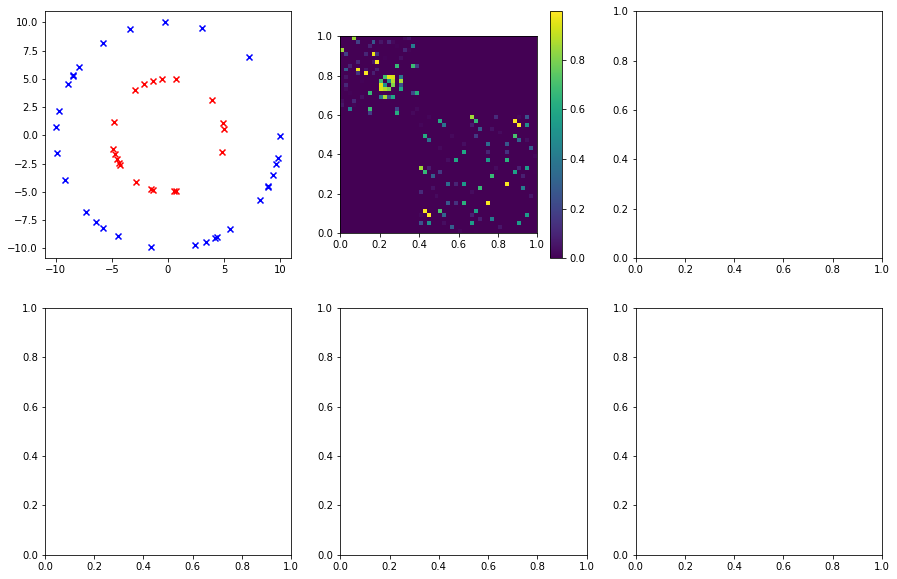

In [417]:
# compute A (step 1)
# experiment with sigsq in question 8
sigsq = 0.9
Aisq = np.power(allpts[:,0], 2) + np.power(allpts[:,1], 2)
Dotprod = allpts.dot(allpts.T)

distmat = - repmat(Aisq, goto, 1) - repmat(Aisq.reshape(-1,1), 1, goto)  + 2*Dotprod
Afast = np.exp(distmat / (2*sigsq))
A = Afast - np.diag(np.diag(Afast))

ax = axes[0,1]
im = ax.imshow(A, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

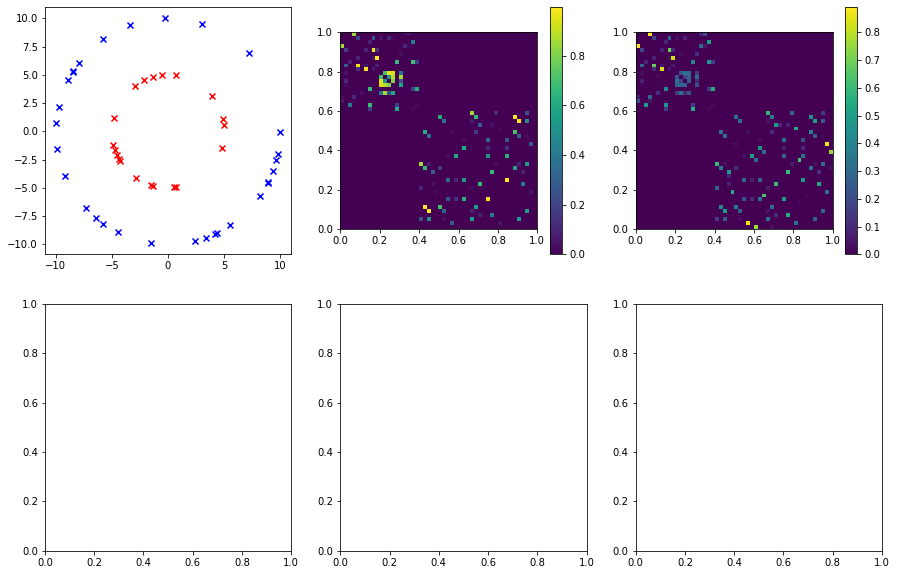

In [418]:
# step 2
D = np.diag(np.sum(A.T, axis=0))
L = np.linalg.inv(np.sqrt(D)).dot(A).dot(np.linalg.inv(np.sqrt(D)))
ax = axes[0,2]
im = ax.imshow(L, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

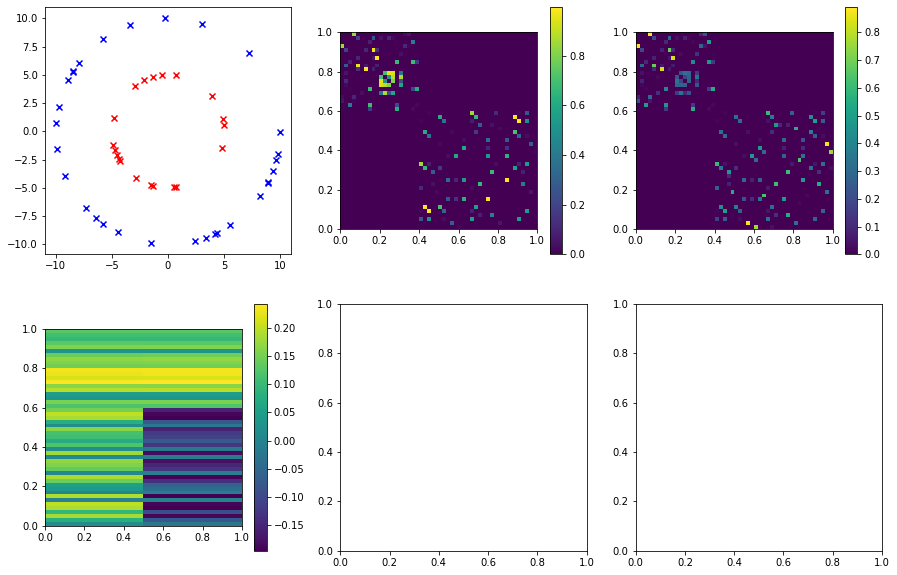

In [419]:
# step 3 
di, X = np.linalg.eig(L)
Xsort, Dsort = eigsort(X,di)
Xuse = Xsort[:, :2]
ax = axes[1,0]
im = ax.imshow(Xuse, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

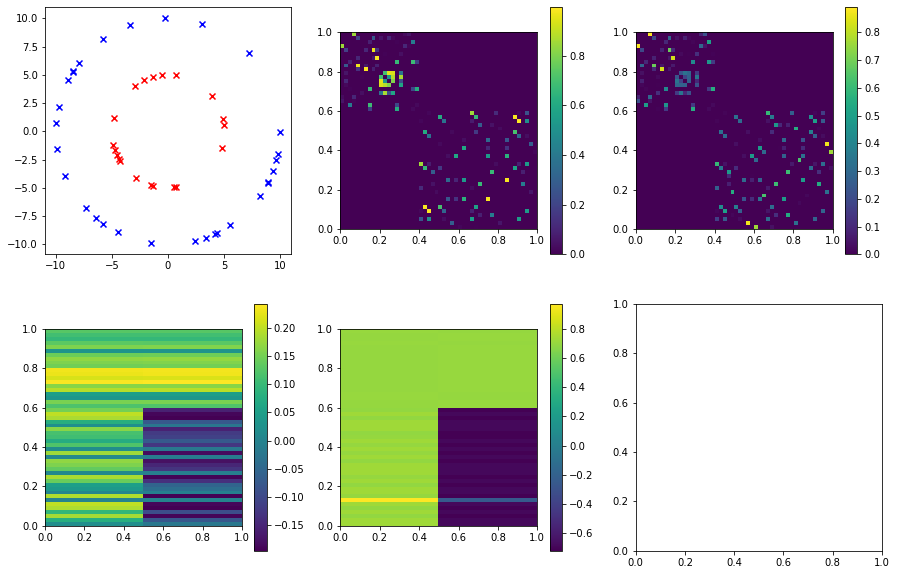

In [420]:
# normalize X to get Y (step 4)
Xsq = np.multiply(Xuse, Xuse)
divmat = repmat(np.sqrt(np.sum(Xsq.T, axis=0)).reshape(-1,1), 1, 2)
Y = np.divide(Xuse, divmat)
ax = axes[1,1]
im = ax.imshow(Y, extent=[0, 1, 0, 1])
fig.colorbar(im, ax=ax)
fig

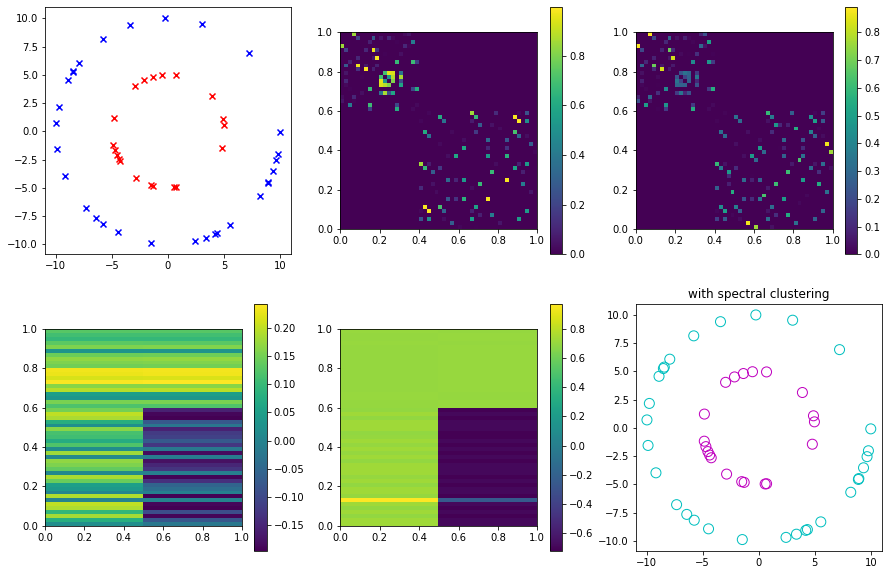

In [421]:
# step 5/6
kmeans = KMeans(n_clusters=2).fit(Y)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[1,2]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with spectral clustering')
fig

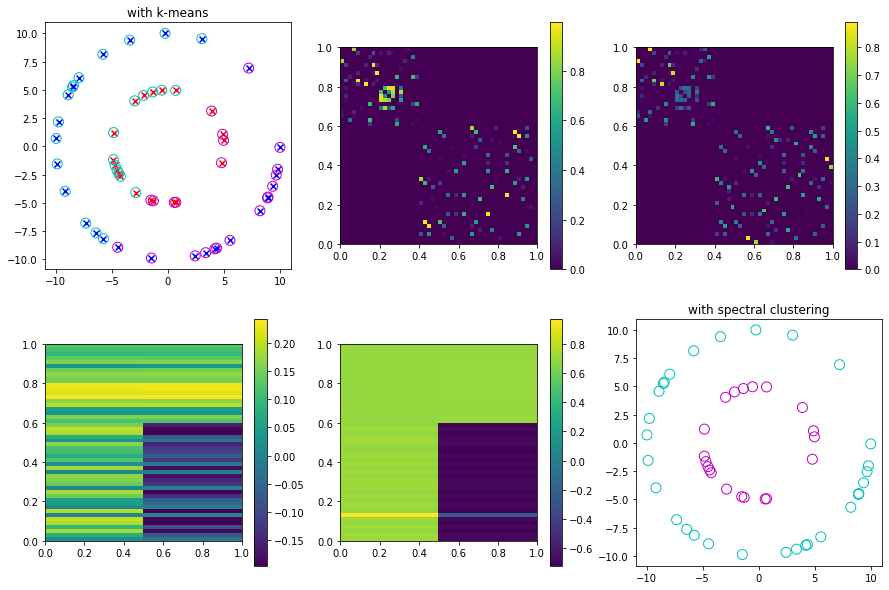

In [422]:
# For comparison run kmeans on original data
kmeans = KMeans(n_clusters=2).fit(allpts)
kk = kmeans.labels_
c1 = np.argwhere(kk == 0)
c2 = np.argwhere(kk == 1)
ax = axes[0, 0]
ax.scatter(allpts[c1][:,0][:,0], allpts[c1][:,0][:,1], edgecolor='c', marker='o', facecolor='none', s=100)
ax.scatter(allpts[c2][:,0][:,0], allpts[c2][:,0][:,1], edgecolor='m', marker='o', facecolor='none', s=100)
ax.set_title('with k-means')
fig



Subplot 1: K-means clustering–not very accurate. Instead of clustering as a center ring and outer, it splits it based on distance (as the algorithm is supposed to) but does not cluster it appropriately for the data set.


Subplots 2-6 are steps involved in spectral clustering.


Subplot 2: This is the formation of the similarity matrix


Subplot 3: The normalized graph Lapacian (L)


Subplot 4: The computation of the top k (in this case 2) eigenvectors of L and placed into columns. 


Subplot 5: The previous computation normalizing X to get Y 


Subplot 6: The product of running k-means but instead of using distance to cluster, using the product of subplot 5 based on density.


The final subplot shows a more appropriate clustering of the inner ring versus the outer ring of data



Siqsq represents sigma (squared). Sigma is the parameter that indicates what how much similarity there is between two points–points that are equivalent in similary will always equal 1 and ones that are completely far away will equal 0, but sigma determines how sensitive the similarity rating will be. The smaller sigma is, the closer points have to be to be considered similar, and the larger sigma is, there is flexibility in distance between two points that could still be considered similar. This was shown in playing around with the sigma value, and the 0.9 value seems to be the optimal value for sigsq because it accurately clustered, while going higher and lower with sigsq through my experience, showed to be less accurate.



I suppose depending on the data, the sigsq value doesn't stay consistent at all. I think the order the data comes in, will determine the points that are compared to each other and because of that, it'll scew the results independent of the sigsq value. Sometimes the sigsq value made a more accurate clustering, and other times not appropriate at all.